In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import h5py
import scipy
from scipy.signal import argrelextrema

In [17]:
fpath="/fs/lustre/cita/hqchen/data/PZ_edge_project/"
fname=fpath+"spec_J1217+0131_sp17_3.5e+56_C_a01286.hdf5"
data=h5py.File(fname,'r')
lrnL=list(data.keys())

In [18]:
wv_kmps=np.linspace(-4000,10000,14001)

In [19]:
fieldL=["xT_1e3yr","xT_3e3yr","xT_1e4yr","xT_3e4yr","xT_1e5yr","xT_3e5yr","xT_1e6yr","xT_3e6yr",
"xT_1e7yr","xT_3e7yr","xT_6e7yr","xT_1e8yr"]
i = 9

### Local maxima using scipy (argrelextrema)

In [5]:
for spectra in range(0,1):
    y = np.array(data.get(lrnL[spectra]+"/spec_"+fieldL[9]))
    x = wv_kmps
    maxima = y[argrelextrema(y, np.greater)[0]]
    print(maxima)
    #this method works well for getting the values, but not graphing
    #this accounts for all local maxima in the raw data

[9.1412e-001 8.0140e-001 8.2541e-001 4.2563e-001 4.0465e-001 3.6035e-001
 3.6633e-001 5.0818e-001 6.3193e-001 5.3502e-001 2.7211e-001 7.0557e-001
 7.0594e-001 1.6723e-001 2.5729e-001 2.2282e-001 4.6444e-001 3.1780e-001
 9.4880e-002 2.8423e-001 4.5950e-001 4.0775e-001 7.1457e-003 7.8744e-002
 3.6025e-002 6.2369e-002 2.0298e-001 5.3863e-002 3.8398e-002 3.5333e-002
 4.1202e-002 2.9699e-001 2.4794e-001 1.8773e-002 5.1968e-063 3.6795e-013
 8.8074e-003 7.1543e-024 5.9194e-003 1.6202e-002 8.1971e-003 1.2259e-002
 1.0179e-001 3.3826e-002 1.9049e-004 2.6620e-011 1.2738e-003 4.6423e-025
 6.5565e-006 2.1471e-014 6.1194e-003 4.5624e-002 1.0186e-001 8.9748e-002
 4.2366e-002 3.1011e-031 8.6360e-015 2.8277e-023 1.1052e-006 3.7362e-006
 1.2826e-016 9.6819e-027 1.5761e-012 5.2264e-008 8.0896e-008 2.1172e-006
 2.0811e-006 1.5844e-020 6.5767e-029 8.3470e-010 2.5006e-009 9.0578e-009
 1.4355e-006 3.3189e-013 8.7845e-014 3.8225e-107 3.3638e-007 1.0641e-051
 9.9189e-050 4.7155e-199 2.5862e-024 2.0096e-027 4.

### Local maximum using np.where

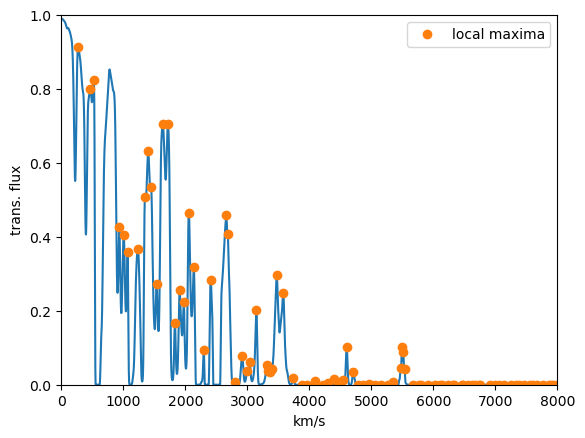

In [7]:
for spectra in range(0,1):
    y = np.array(data.get(lrnL[spectra]+"/spec_"+fieldL[9]))
    x = wv_kmps
    peaks = np.where((y[1:-1] > y[0:-2]) * (y[1:-1] > y[2:]))[0] + 1
    # these values match with those above -- scipy method -- but this method is better for graphing
    plt.plot(x,y)
    plt.plot(x[peaks],y[peaks], 'o', label = 'local maxima')
    plt.xlim(0,8000)
    plt.ylim(0,1)
    plt.xlabel("km/s")
    plt.ylabel("trans. flux")
    plt.legend()
#print(y[peaks])
plt.show()

### Histogram of full spectrum (including all values, not just local maxima)

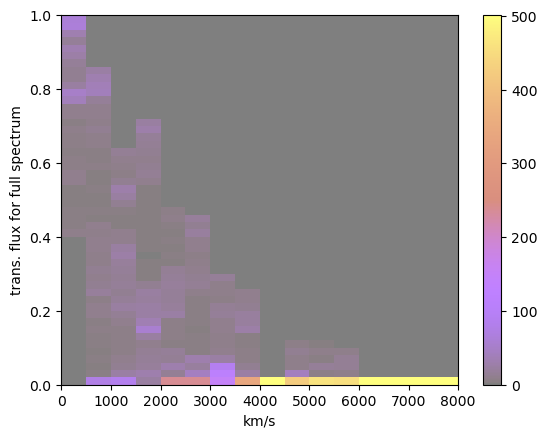

In [8]:
for spectra in range(0,1):
    y = np.array(data.get(lrnL[spectra]+"/spec_"+fieldL[9]))
    x = wv_kmps
    
    plt.hist2d(x, y, bins= [[0,500,1000,1500,2000,2500,3000,3500,4000,4500,
                                          5000,5500,6000,6500,7000,7500,8000], 50], cmap = plt.cm.gnuplot, alpha = 0.5)
    plt.xlim(0,8000)
    plt.ylim(0,1)
    plt.xlabel("km/s")
    plt.ylabel("trans. flux for full spectrum")
    plt.colorbar()
    plt.show

### Histogram of local maxima only

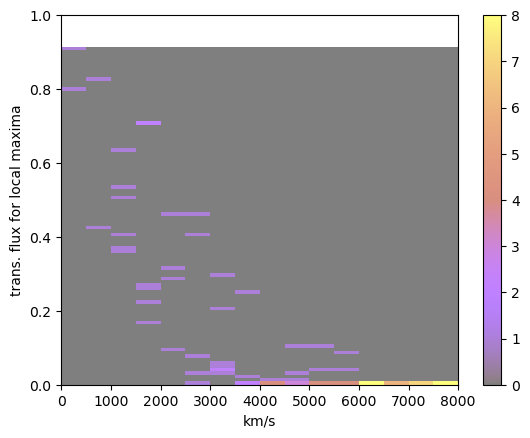

In [12]:
for spectra in range(0,1):
    y = np.array(data.get(lrnL[spectra]+"/spec_"+fieldL[9]))
    x = wv_kmps
    peaks = np.where((y[1:-1] > y[0:-2]) * (y[1:-1] > y[2:]))[0] + 1
    
    plt.hist2d(x[peaks], y[peaks], bins= [[0,500,1000,1500,2000,2500,3000,3500,4000,4500,
                                          5000,5500,6000,6500,7000,7500,8000], 100], cmap = plt.cm.gnuplot, alpha = 0.5)
    plt.xlim(0,8000)
    plt.ylim(0,1)
    plt.xlabel("km/s")
    plt.ylabel("trans. flux for local maxima")
    plt.colorbar()
plt.show()

### Histogram for all local maxima (1000 spectra)

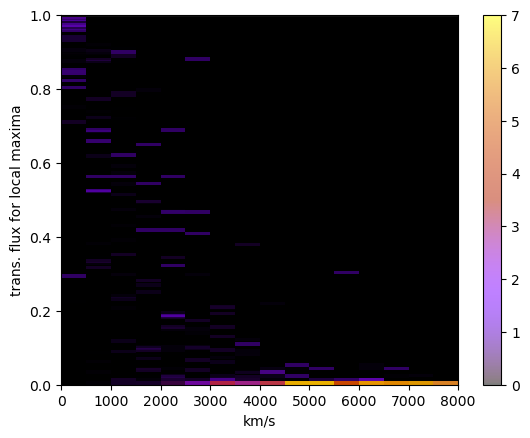

In [30]:
for spectra in range(0,999):
    y = np.array(data.get(lrnL[spectra]+"/spec_"+fieldL[9]))
    x = wv_kmps
    peaks = np.where((y[1:-1] > y[0:-2]) * (y[1:-1] > y[2:]))[0] + 1
    
    plt.hist2d(x[peaks], y[peaks], bins= [[0,500,1000,1500,2000,2500,3000,3500,4000,4500,
                                          5000,5500,6000,6500,7000,7500,8000], 100], cmap = plt.cm.gnuplot, alpha = 0.5)
    plt.xlim(0,8000)
    plt.ylim(0,1)
    plt.xlabel("km/s")
    plt.ylabel("trans. flux for local maxima")
plt.colorbar()
plt.show()

### Comparison between histogram and line graph (for local maxima only), ONE SPECTRUM ONLY

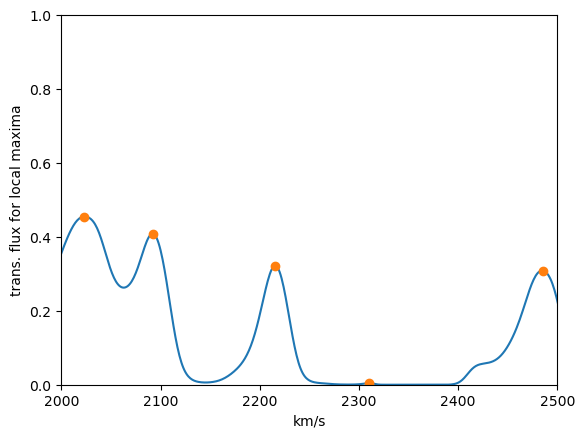

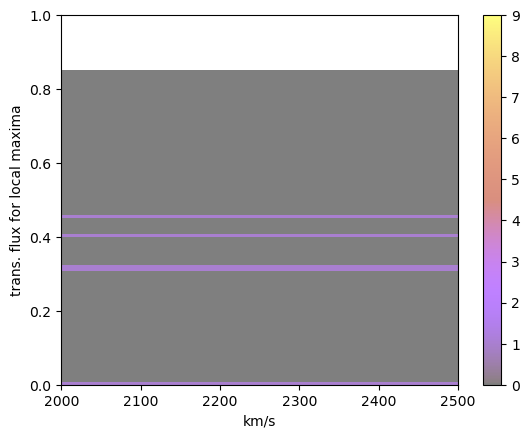

In [33]:
# Line graph:
for spectra in range(370,371):
    y = np.array(data.get(lrnL[spectra]+"/spec_"+fieldL[9]))
    x = wv_kmps
    peaks = np.where((y[1:-1] > y[0:-2]) * (y[1:-1] > y[2:]))[0] + 1
    plt.plot(x,y)
    plt.plot(x[peaks],y[peaks], 'o', label = 'local maxima')
    plt.xlim(2000,2500)
    plt.ylim(0,1)
    plt.xlabel("km/s")
    plt.ylabel("trans. flux for local maxima")
    #plt.legend()
    #print(y[peaks])
plt.show()

# Histogram:
for spectra in range(370,371):
    y = np.array(data.get(lrnL[spectra]+"/spec_"+fieldL[9]))
    x = wv_kmps
    peaks = np.where((y[1:-1] > y[0:-2]) * (y[1:-1] > y[2:]))[0] + 1
    
    plt.hist2d(x[peaks], y[peaks], bins= [[0,500,1000,1500,2000,2500,3000,3500,4000,4500,
                                          5000,5500,6000,6500,7000,7500,8000], 100], cmap = plt.cm.gnuplot, alpha = 0.5)
    plt.xlim(2000,2500)
    plt.ylim(0,1)
    plt.xlabel("km/s")
    plt.ylabel("trans. flux for local maxima")
    #print(y[peaks])
plt.colorbar()
plt.show()


### Comparison between histogram and line graph (for local maxima only), MULTIPLE SPECTRA

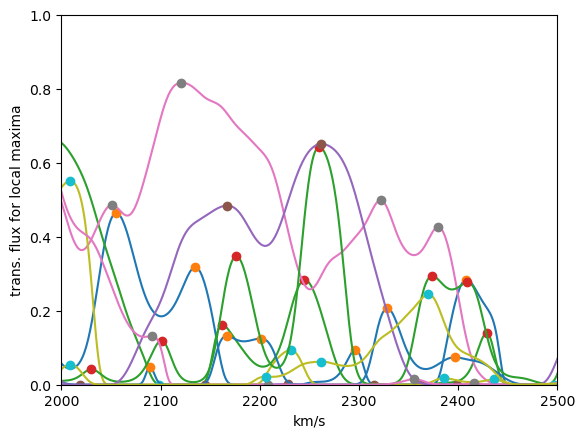

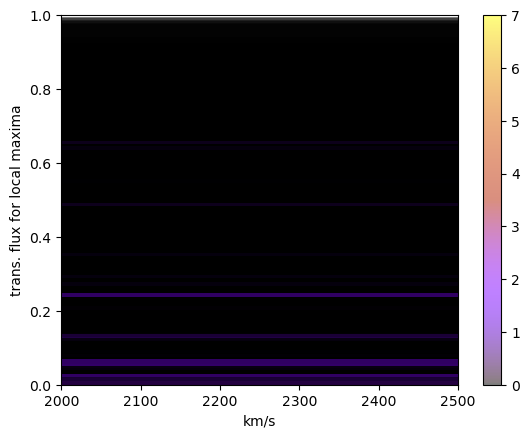

In [27]:
# Line graph:
for spectra in range(0,10):
    y = np.array(data.get(lrnL[spectra]+"/spec_"+fieldL[9]))
    x = wv_kmps
    peaks = np.where((y[1:-1] > y[0:-2]) * (y[1:-1] > y[2:]))[0] + 1
    plt.plot(x,y)
    plt.plot(x[peaks],y[peaks], 'o', label = 'local maxima')
    plt.xlim(2000,2500)
    plt.ylim(0,1)
    plt.xlabel("km/s")
    plt.ylabel("trans. flux for local maxima")
    #plt.legend()
    #print(y[peaks])
plt.show()

# Histogram:
for spectra in range(0,10):
    y = np.array(data.get(lrnL[spectra]+"/spec_"+fieldL[9]))
    x = wv_kmps
    peaks = np.where((y[1:-1] > y[0:-2]) * (y[1:-1] > y[2:]))[0] + 1
    
    plt.hist2d(x[peaks], y[peaks], bins= [[0,500,1000,1500,2000,2500,3000,3500,4000,4500,
                                          5000,5500,6000,6500,7000,7500,8000], 100], cmap = plt.cm.gnuplot, alpha = 0.5)
    plt.xlim(2000,2500)
    plt.ylim(0,1)
    plt.xlabel("km/s")
    plt.ylabel("trans. flux for local maxima")
    #print(y[peaks])
plt.colorbar()
plt.show()
